## Цели: 
- построить модель для задачи классификации, которая выберет подходящий тариф
- исследовать разные модели классификации и максимизировать точность

#### Импорт и просмотр данных

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns

from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv("users_behavior.csv")
data.head()

,calls,minutes,messages,mb_used,is_ultra
0,40.0,311.90,83.0,19915.42,0
1,85.0,516.75,56.0,22696.96,0
2,77.0,467.66,86.0,21060.45,0
3,106.0,745.53,81.0,8437.39,1
4,66.0,418.74,1.0,14502.75,0


#### Анализ

Посмотрим на типы данных. Нужны типы float и int для корректного обучения

In [3]:
data.dtypes

calls       float64
minutes     float64
messages    float64
mb_used     float64
is_ultra      int64
dtype: object

Все хорошо. Иду дальше

Проверим наличие нулевых значений в датасете

In [5]:
data.isnull().sum()

calls       0
minutes     0
messages    0
mb_used     0
is_ultra    0
dtype: int64

In [7]:
data.groupby(['is_ultra']).mean() # средние показатели на тариф

,calls,minutes,messages,mb_used
is_ultra,,,,
0,58.463437,405.942952,33.384029,16208.466949
1,73.392893,511.224569,49.363452,19468.823228


#### Визуализация

Посмотрим на гистограммы каждого показателя: кол-во звонков, кол-во минут, кол-во смс и кол-во мегабайт интернета. 
И посмотрим на форму KDE для интереса

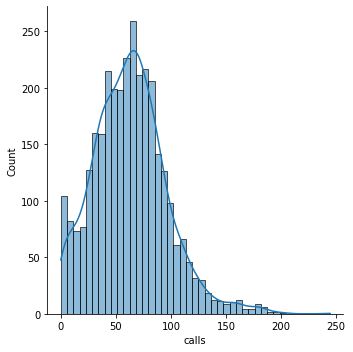

In [8]:
sns.displot(data=data, x="calls", kde=True)

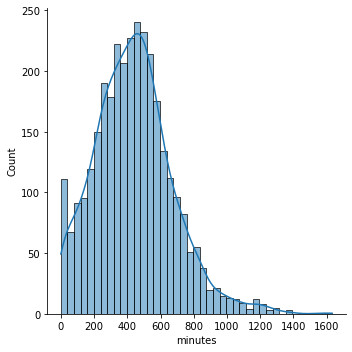

In [9]:
sns.displot(data=data, x="minutes", kde=True)

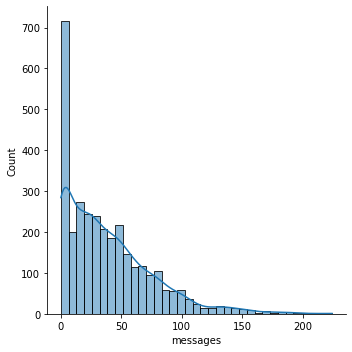

In [10]:
sns.displot(data=data, x="messages", kde=True)

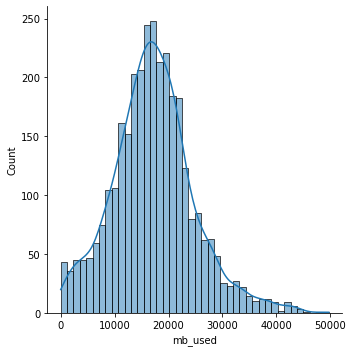

In [11]:
sns.displot(data=data, x="mb_used",kde=True)

#### Подготовка данных

In [13]:
X = data[['calls','minutes','messages','mb_used']]
Y = data.is_ultra

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=42) #разделение

In [15]:
X_train

,calls,minutes,messages,mb_used
744,22.0,155.06,22.0,2253.50
226,54.0,418.34,85.0,15291.95
2402,143.0,905.06,109.0,18553.82
2840,88.0,464.78,66.0,15602.34
881,82.0,692.25,38.0,21644.14
...,...,...,...,...
1095,62.0,454.02,35.0,15018.46
1130,69.0,465.96,12.0,14982.27
1294,40.0,280.44,2.0,13934.54
860,72.0,410.23,68.0,16006.55


In [16]:
y_train

744     1
226     0
2402    1
2840    0
881     0
       ..
1095    0
1130    0
1294    0
860     0
3174    0
Name: is_ultra, Length: 2410, dtype: int64

# Обучение

попробуем KNN, Linear Classifier, Decision Tree и RandomForestClassifier

## K-nearest Neighbors (KNN) Classification Model

In [17]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
knn_accuracy = accuracy_score(y_test, y_pred)
knn_accuracy

0.7898009950248757

## Linear Classifier with Perceptron

In [18]:
from sklearn.linear_model import Perceptron

per = Perceptron(random_state = 40)
per.fit(X_train, y_train)
y_pred = per.predict(X_test)
per_accuracy = accuracy_score(y_test, y_pred)
per_accuracy

0.7089552238805971

## Decision Tree

In [19]:
from sklearn.tree import DecisionTreeClassifier

In [20]:
loanTree = DecisionTreeClassifier(max_depth = 4)

In [21]:
loanTree.fit(X_train,y_train)
y_pred = loanTree.predict(X_test)
decision_tree_accuracy = accuracy_score(y_test, y_pred)
decision_tree_accuracy

0.8059701492537313

## RandomForestClassifier

In [29]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=1000)
forest.fit(X_train,y_train)
y_pred = forest.predict(X_test)
forest_accuracy = accuracy_score(y_test, y_pred)
forest_accuracy

0.8233830845771144

## Итог

In [36]:
summary = pd.DataFrame([['KNN', knn_accuracy], ['Linear Classifier', per_accuracy], ['Decision Tree', decision_tree_accuracy],['RandomForestClassifier', forest_accuracy]], columns=['name', 'accuracy_score']).set_index(['name']).sort_values(by='accuracy_score', ascending = False)
summary.style.background_gradient(cmap = 'Purples')

,accuracy_score
name,
RandomForestClassifier,0.823383
Decision Tree,0.805970
KNN,0.789801
Linear Classifier,0.708955


лучшим оказался RandomForestClassifier